# Import and Reading Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv (r'C:\Users\Desktop\Data Analytics Work\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df ['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

# Wrangling and Manipulating Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
missing_data = df.isnull ()
missing_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [12]:
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print ("")

gender
False    1000
Name: gender, dtype: int64

race/ethnicity
False    1000
Name: race/ethnicity, dtype: int64

parental level of education
False    1000
Name: parental level of education, dtype: int64

lunch
False    1000
Name: lunch, dtype: int64

test preparation course
False    1000
Name: test preparation course, dtype: int64

math score
False    1000
Name: math score, dtype: int64

reading score
False    1000
Name: reading score, dtype: int64

writing score
False    1000
Name: writing score, dtype: int64



In [13]:
df['Math Pass Score'] = np.where(df['math score'] > 49, 'Pass', 'Fail')
df['Reading Pass Score'] = np.where(df['reading score']> 49, 'Pass', 'Fail')
df ['Writing Pass Score'] = np.where (df['writing score'] > 49, 'Pass', 'Fail')

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math Pass Score,Reading Pass Score,Writing Pass Score
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Fail,Pass,Fail
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass


In [15]:
df['Math Pass Score'].value_counts()

Pass    865
Fail    135
Name: Math Pass Score, dtype: int64

In [16]:
df['Reading Pass Score'].value_counts()

Pass    910
Fail     90
Name: Reading Pass Score, dtype: int64

In [17]:
df['Writing Pass Score'].value_counts()

Pass    886
Fail    114
Name: Writing Pass Score, dtype: int64

In [18]:
del df['race/ethnicity']

 # Who gets the highest score in tests, male or female?¶

# Math Score

In [22]:
gender = df.groupby(['math score', 'gender']).agg ({'math score': 'count'}).tail(10)
gender

math score
math score gender            
96         female           2
           male             1
97         female           2
           male             4
98         female           1
           male             2
99         female           2
           male             1
100        female           3
           male             4

Text(0.5, 0, 'Gender')

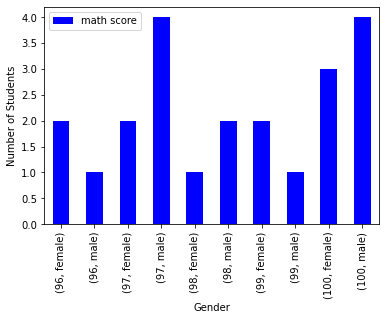

In [28]:
gender.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("Gender")

# Reading Score

In [25]:
reading = df.groupby(['reading score', 'gender']).agg ({'reading score': 'count'}).tail(10)
reading

reading score
reading score gender               
93            male                1
94            female              3
95            female              8
96            female              1
              male                3
97            female              4
              male                1
99            female              3
100           female             14
              male                3

Text(0.5, 0, 'Gender')

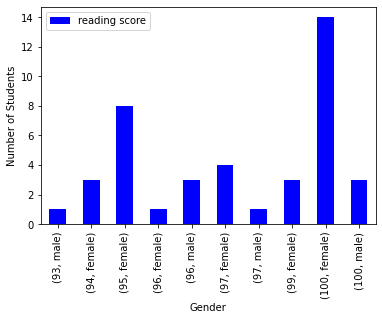

In [29]:
reading.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("Gender")


# Writing Score

In [30]:
writing = df.groupby(['writing score', 'gender']).agg ({'writing score': 'count'}).tail(10)
writing

writing score
writing score gender               
94            female              6
95            female              7
              male                1
96            female              4
97            female              2
98            female              2
99            female              3
              male                1
100           female             13
              male                1

Text(0.5, 0, 'Gender')

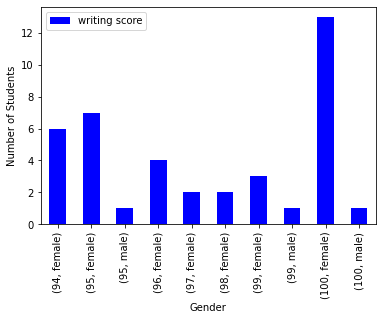

In [31]:
writing.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("Gender")


# Who gets the highest score based on parental level of education?


# Math Score

In [32]:
math = df.groupby(['math score', 'parental level of education']).agg ({'math score': 'count'}).tail(10)
math

math score
math score parental level of education            
97         some college                          1
           some high school                      1
98         associate's degree                    1
           some college                          2
99         bachelor's degree                     1
           high school                           1
           some college                          1
100        associate's degree                    2
           bachelor's degree                     2
           some college                          3

Text(0.5, 0, 'Gender')

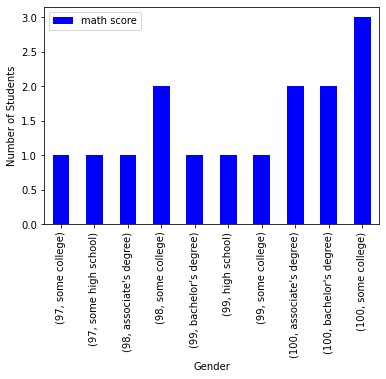

In [33]:
math.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("Gender")

# Reading Score

In [35]:
reading_score = df.groupby(['reading score', 'parental level of education']).agg ({'reading score': 'count'}).tail(10)
reading_score


reading score
reading score parental level of education               
97            master's degree                          1
              some college                             2
              some high school                         1
99            high school                              1
              master's degree                          2
100           associate's degree                       4
              bachelor's degree                        8
              master's degree                          2
              some college                             1
              some high school                         2

Text(0.5, 0, 'parental level of education')

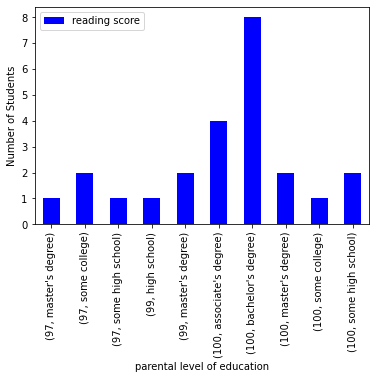

In [36]:
reading_score.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("parental level of education")


# Writing Score

In [37]:
writing_score = df.groupby(['writing score', 'parental level of education']).agg ({'writing score': 'count'}).tail(10)
writing_score

writing score
writing score parental level of education               
98            associate's degree                       1
              some college                             1
99            associate's degree                       1
              bachelor's degree                        1
              some college                             2
100           associate's degree                       1
              bachelor's degree                        7
              high school                              1
              master's degree                          4
              some high school                         1

Text(0.5, 0, 'parental level of education')

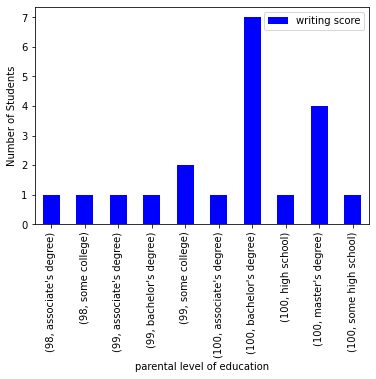

In [38]:
writing_score.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("parental level of education")



# Who gets the highest score based on "test preparation course"?

# Math Score

In [40]:
math_score = df.groupby(['math score', 'test preparation course']).agg ({'math score': 'count'}).tail(10)
math_score


math score
math score test preparation course            
95         none                              1
96         completed                         3
97         completed                         3
           none                              3
98         completed                         2
           none                              1
99         completed                         2
           none                              1
100        completed                         4
           none                              3

Text(0.5, 0, 'test preparation course')

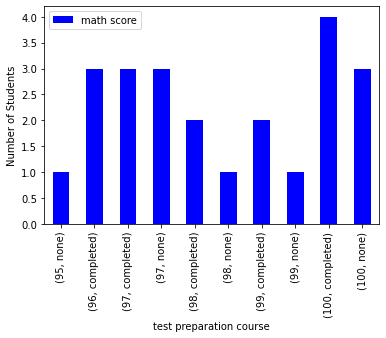

In [41]:
math_score.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("test preparation course")


# Reading Score

In [42]:
score_reading = df.groupby(['reading score', 'test preparation course']).agg ({'reading score': 'count'}).tail(10)
score_reading

reading score
reading score test preparation course               
94            none                                 1
95            completed                            3
              none                                 5
96            completed                            3
              none                                 1
97            completed                            3
              none                                 2
99            completed                            3
100           completed                           11
              none                                 6

Text(0.5, 0, 'test preparation course')

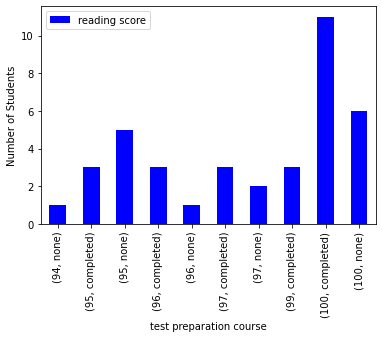

In [43]:
score_reading.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("test preparation course")




# Writing Score

In [44]:
score_writing = df.groupby(['reading score', 'test preparation course']).agg ({'reading score': 'count'}).tail(10)
score_writing

reading score
reading score test preparation course               
94            none                                 1
95            completed                            3
              none                                 5
96            completed                            3
              none                                 1
97            completed                            3
              none                                 2
99            completed                            3
100           completed                           11
              none                                 6

Text(0.5, 0, 'test preparation course')

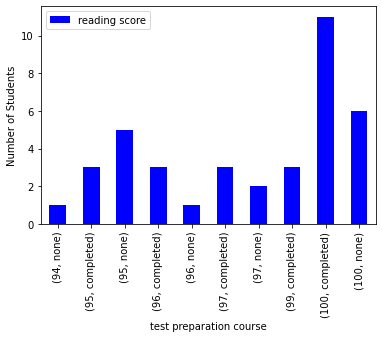

In [46]:
score_writing.plot.bar (color = "b")
plt.ylabel ("Number of Students")
plt.xlabel ("test preparation course")

